# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [161]:
import numpy as np
from scipy.optimize import differential_evolution

import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [105]:
result.nit

90

In [193]:
strategy_u = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 
                       'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
                       'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
popsize_u = [i for i in range(3,15)]
tol_u = np.linspace(0, 0.3, 12).tolist()
mutation_u = np.linspace(0, 1.999999999, 12).tolist()
recombination_u = np.linspace(0, 2, 12).tolist()
updating_u = ['immediate', 'deferred']*6

In [30]:
mutation_u

[0.0,
 0.18181727272727272,
 0.36363454545454543,
 0.5454518181818182,
 0.7272690909090909,
 0.9090863636363635,
 1.0909036363636364,
 1.272720909090909,
 1.4545381818181817,
 1.6363554545454544,
 1.818172727272727,
 1.99999]

In [27]:
# param = { 'strategy' : strategy_u, 'popsize' : popsize_u,  'tol' : tol_u, 'mutation' : mutation_u, 
#          'recombination' : recombination_u, 'updating' : updating_u}

In [31]:
param = [strategy_u, popsize_u,  tol_u, mutation_u, 
        recombination_u, updating_u]

In [32]:
for i in param:
    print(len(i))

12
12
12
12
12
12


In [192]:
df   = pd.DataFrame(columns = ['strategy', 'popsize',  'tol', 'mutation', 'recombination', 'updating', 'result', 'n_iter'])
df

,strategy,popsize,tol,mutation,recombination,updating,result,n_iter


In [194]:
for i in range(1000):

    j_1 = np.random.randint(0, 12)
    j_2 = np.random.randint(0, 12)
    j_3 = np.random.randint(0, 12)
    j_4 = np.random.randint(0, 12)
    j_5 = np.random.randint(0, 12)
    j_6 = np.random.randint(0, 12)
        
    result = differential_evolution(ackley, bounds, seed=42, strategy=strategy_u[j_1], popsize=popsize_u[j_2], tol=tol_u[j_3], 
                                    mutation=mutation_u[j_4], recombination=recombination_u[j_5], updating=updating_u[j_6])
    
    
    df2 = pd.DataFrame([[strategy_u[j_1], popsize_u[j_2], tol_u[j_3], mutation_u[j_4], recombination_u[j_5], updating_u[j_6],
              np.round(result.fun, 5), result.nit]], columns = ['strategy', 'popsize',  'tol', 'mutation', 'recombination', 'updating', 'result', 'n_iter'])
    df = df.append(df2, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   strategy       1000 non-null   object 
 1   popsize        1000 non-null   object 
 2   tol            1000 non-null   float64
 3   mutation       1000 non-null   float64
 4   recombination  1000 non-null   float64
 5   updating       1000 non-null   object 
 6   result         1000 non-null   float64
 7   n_iter         1000 non-null   object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


In [205]:
df['n_iter'] = pd.to_numeric(df['n_iter'])

In [207]:
popsize_1  = pd.cut(df.popsize, 10)
mutation_1 = pd.cut(df.mutation, 10)


table_1 = pd.pivot_table(df, 
                          values = ['n_iter'],  
                          index =   mutation_1,
                          columns = popsize_1, 
                          aggfunc = ['median'])
table_1

median                                              \
                    n_iter                                               
popsize       (2.989, 4.1] (4.1, 5.2] (5.2, 6.3] (6.3, 7.4] (7.4, 8.5]   
mutation                                                                 
(-0.002, 0.2]          3.0        9.0       21.0        9.0       12.0   
(0.2, 0.4]            13.5       11.0        5.0        1.0      132.0   
(0.4, 0.6]            10.0       50.0      127.0      108.0       94.5   
(0.6, 0.8]            41.0      374.0       68.0      503.0      244.0   
(0.8, 1.0]            76.0      179.0       15.0      425.0      275.5   
(1.0, 1.2]            38.0       15.0      279.0      222.0      202.0   
(1.2, 1.4]            24.0       40.5       37.0        5.0       27.0   
(1.4, 1.6]            40.0      286.0      360.0      442.0      383.0   
(1.6, 1.8]            87.0      900.0      309.0        1.0      480.0   
(1.8, 2.0]           145.0      242.0       18.0      353.0      605.0   

                                                                             
                                                                             
popsize       (8.5, 9.6] (9.6, 10.7] (10.7, 11.8] (11.8, 12.9] (12.9, 14.0]  
mutation                                                                     
(-0.002, 0.2]        8.0         9.5         57.0          8.0         17.0  
(0.2, 0.4]         115.0        78.0        524.5         82.0        103.5  
(0.4, 0.6]          52.5       114.5         83.0        161.5        115.0  
(0.6, 0.8]         117.0       162.5         94.0        105.5        218.0  
(0.8, 1.0]          46.0       393.5        338.5        225.0        204.5  
(1.0, 1.2]         304.0       291.5        184.0       1000.0        308.5  
(1.2, 1.4]          14.0       237.0        327.0        452.0        490.0  
(1.4, 1.6]         818.0       476.5        361.0        689.5        630.0  
(1.6, 1.8]         475.0       830.0        764.0        507.5        387.0  
(1.8, 2.0]         582.5      1000.0        656.0        516.0        714.0

(10.5, -0.5)

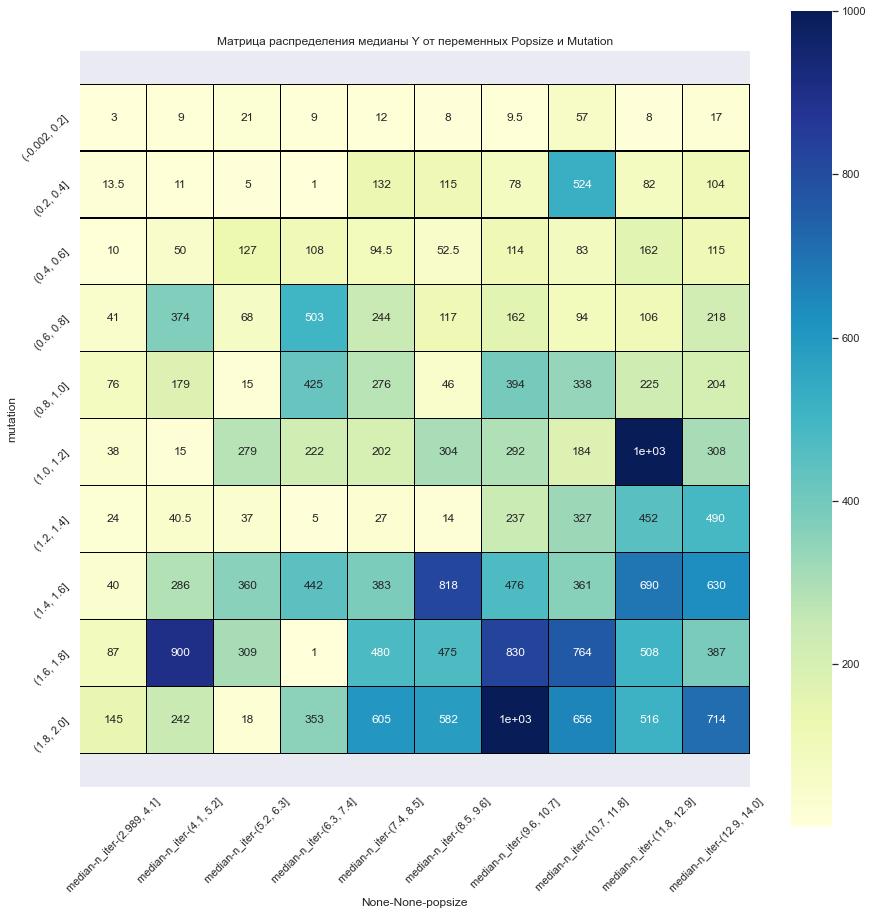

In [208]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.heatmap(table_1,  
                annot = True, 
                fmt='.3g', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black', 
                square=True)

plt.title('Матрица распределения медианы Y от переменных Popsize и Mutation')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [109]:
df1 = pd.DataFrame(columns = ['strategy', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, strategy=strategy_u[j_1])
    
    
    df2 = pd.DataFrame([[strategy_u[j_1],  result.success,
              result.fun, result.nit]], columns = ['strategy', 'success', 'result', 'n_iter'])
    df1 = df1.append(df2, ignore_index=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  100 non-null    object 
 1   success   100 non-null    object 
 2   result    100 non-null    float64
 3   n_iter    100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [135]:
df1.sort_values(by=['n_iter'], axis=0, inplace=True, ascending=True)
df1

In [173]:
df1.head(5)

,strategy,success,result,n_iter
39,best1bin,True,4.440892e-16,90
41,best1bin,True,4.440892e-16,90
95,best1bin,True,4.440892e-16,90
70,best1bin,True,4.440892e-16,90
36,best1bin,True,4.440892e-16,90


In [134]:
table    = pd.pivot_table(df1[df1.success == True], 
                          values = ['n_iter'],  
                          index =  ['strategy'],                          
                          aggfunc = ['min', 'max'])
table

,min,max
,n_iter,n_iter
strategy,,
best1bin,90,90
best1exp,147,147
best2bin,166,166
best2exp,244,244
rand1bin,168,168
rand1exp,246,246
rand2bin,232,232
rand2exp,341,341


***Стратегия best1bin является самой выигрышной***

In [153]:
df3 = pd.DataFrame(columns = ['popsize', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, popsize=popsize_u[j_1])
    
    
    df2 = pd.DataFrame([[popsize_u[j_1],  result.success,
              np.round(result.fun, 5), result.nit]], columns = ['popsize', 'success', 'result', 'n_iter'])
    df3 = df3.append(df2, ignore_index=True)

table    = pd.pivot_table(df3, 
                          values = ['success', 'result','n_iter'],  
                          index =  ['popsize'],                          
                          aggfunc = ['min', 'max'])
table

min                     max                 
        n_iter   result success n_iter   result success
popsize                                                
3           29  0.00063    True     29  0.00063    True
4           39  0.00001    True     39  0.00001    True
5          100  0.00000    True    100  0.00000    True
6           99  0.00000    True     99  0.00000    True
7           87  0.00000    True     87  0.00000    True
8           97  0.00000    True     97  0.00000    True
9          101  0.00000    True    101  0.00000    True
10          97  0.00000    True     97  0.00000    True
11          89  0.00000    True     89  0.00000    True
12          96  0.00000    True     96  0.00000    True
13          96  0.00000    True     96  0.00000    True
14          99  0.00000    True     99  0.00000    True

***Популяции размеров в 2-ве особи недостаточно чтобы найти глобальный минимум. Популяция в 3-ри особи отностительно точно и небольшим количеством итераций достигла минимума. В общем можно найти популяцию которая оптимально по количеству итераций и точности нахождения цели.***

In [168]:
df4 = pd.DataFrame(columns = ['tol', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, tol=tol_u[j_1])
    
    
    df2 = pd.DataFrame([[tol_u[j_1],  result.success,
              np.round(result.fun, 5), result.nit]], columns = ['tol', 'success', 'result', 'n_iter'])
    df4 = df4.append(df2, ignore_index=True)

table    = pd.pivot_table(df4, 
                          values = ['success', 'result','n_iter'],  
                          index =  ['tol'],                          
                          aggfunc = ['min', 'max'])
table

min                   max               
         n_iter result success n_iter result success
tol                                                 
0.000000     90    0.0    True     90    0.0    True
0.027273     90    0.0    True     90    0.0    True
0.054545     90    0.0    True     90    0.0    True
0.081818     90    0.0    True     90    0.0    True
0.109091     90    0.0    True     90    0.0    True
0.136364     90    0.0    True     90    0.0    True
0.163636     90    0.0    True     90    0.0    True
0.190909     90    0.0    True     90    0.0    True
0.218182     90    0.0    True     90    0.0    True
0.245455     90    0.0    True     90    0.0    True
0.272727     90    0.0    True     90    0.0    True
0.300000     90    0.0    True     90    0.0    True

In [169]:
df4 = pd.DataFrame(columns = ['tol', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, tol=tol_u[j_1])
    
    
    df2 = pd.DataFrame([[tol_u[j_1],  result.success,
              np.round(result.fun, 5), result.nit]], columns = ['tol', 'success', 'result', 'n_iter'])
    df4 = df4.append(df2, ignore_index=True)

table    = pd.pivot_table(df4, 
                          values = ['success', 'result','n_iter'],  
                          index =  ['tol'],                          
                          aggfunc = ['min', 'max'])
table

min                   max               
         n_iter result success n_iter result success
tol                                                 
0.000000     90    0.0    True     90    0.0    True
0.027273     90    0.0    True     90    0.0    True
0.054545     90    0.0    True     90    0.0    True
0.081818     90    0.0    True     90    0.0    True
0.109091     90    0.0    True     90    0.0    True
0.136364     90    0.0    True     90    0.0    True
0.163636     90    0.0    True     90    0.0    True
0.190909     90    0.0    True     90    0.0    True
0.218182     90    0.0    True     90    0.0    True
0.245455     90    0.0    True     90    0.0    True
0.272727     90    0.0    True     90    0.0    True
0.300000     90    0.0    True     90    0.0    True

***Видим что если tol больше 0,3 то происходит всего 1 итерация и глобальный минимум не достигается***

In [170]:
df5 = pd.DataFrame(columns = ['mutation', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, mutation=mutation_u[j_1])
    
    
    df2 = pd.DataFrame([[mutation_u[j_1],  result.success,
              np.round(result.fun, 5), result.nit]], columns = ['mutation', 'success', 'result', 'n_iter'])
    df5 = df5.append(df2, ignore_index=True)

table    = pd.pivot_table(df5, 
                          values = ['success', 'result','n_iter'],  
                          index =  ['mutation'],                          
                          aggfunc = ['min', 'max'])
table

min                     max                 
         n_iter   result success n_iter   result success
mutation                                                
0.000000      3  3.57445    True      3  3.57445    True
0.181818     28  0.00000    True     28  0.00000    True
0.363636     42  0.00000    True     42  0.00000    True
0.545455     69  0.00000    True     69  0.00000    True
0.727273     96  0.00000    True     96  0.00000    True
0.909091    134  0.00000    True    134  0.00000    True
1.090909    174  0.00000    True    174  0.00000    True
1.272727    222  0.00000    True    222  0.00000    True
1.454545    281  0.00000    True    281  0.00000    True
1.636364    313  0.00000    True    313  0.00000    True
1.818182    376  0.00000    True    376  0.00000    True
2.000000    114  0.00000    True    114  0.00000    True

In [171]:
df6 = pd.DataFrame(columns = ['recombination', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, recombination=recombination_u[j_1])
    
    
    df2 = pd.DataFrame([[recombination_u[j_1],  result.success,
              np.round(result.fun, 5), result.nit]], columns = ['recombination', 'success', 'result', 'n_iter'])
    df6 = df6.append(df2, ignore_index=True)

table    = pd.pivot_table(df6, 
                          values = ['success', 'result','n_iter'],  
                          index =  ['recombination'],                          
                          aggfunc = ['min', 'max'])
table

min                   max               
              n_iter result success n_iter result success
recombination                                            
0.000000         111    0.0    True    111    0.0    True
0.181818         116    0.0    True    116    0.0    True
0.363636         106    0.0    True    106    0.0    True
0.545455          97    0.0    True     97    0.0    True
0.727273          93    0.0    True     93    0.0    True
0.909091          82    0.0    True     82    0.0    True
1.090909          82    0.0    True     82    0.0    True
1.272727          82    0.0    True     82    0.0    True
1.454545          82    0.0    True     82    0.0    True
1.636364          82    0.0    True     82    0.0    True
1.818182          82    0.0    True     82    0.0    True
2.000000          82    0.0    True     82    0.0    True

In [172]:
df7 = pd.DataFrame(columns = ['updating', 'success', 'result', 'n_iter'])

for i in range(100):

    j_1 = np.random.randint(0, 12)
            
    result = differential_evolution(ackley, bounds, seed=42, updating=updating_u[j_1])
    
    
    df2 = pd.DataFrame([[updating_u[j_1],  result.success,
              np.round(result.fun, 5), result.nit]], columns = ['updating', 'success', 'result', 'n_iter'])
    df7 = df7.append(df2, ignore_index=True)

table    = pd.pivot_table(df7, 
                          values = ['success', 'result','n_iter'],  
                          index =  ['updating'],                          
                          aggfunc = ['min', 'max'])
table

min                   max               
          n_iter result success n_iter result success
updating                                             
deferred     122    0.0    True    122    0.0    True
immediate     90    0.0    True     90    0.0    True